【問題1】コンペティション内容の把握<br>
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。<br>
　① Home Creditはどのような企業？<br>
　② このコンペティションでは何を予測する？<br>
　③ それを予測することで企業が得られるメリットは何？<br>

① Home Creditはどのような企業？<br>
　HomeCredit社はローンを組むことに困窮している人に対して、ローンを含む金融包摂の拡大を務めている<br>
② このコンペティションでは何を予測する？<br>
　クライアントの情報から返済能力を予測する<br>
③ それを予測することで企業が得られるメリットは何？<br>
　本来は返済能力があるにも関わらずローンが組めない人に対してローンを組むことが可能となり、利息などで利益を得ることが出来る<br>

【問題2】データの概観の把握<br>
データの概観を把握するために以下のようなことを行ってください。<br>
　① .head()、.info()、describe()などを使う<br>
　② 欠損値の有無を見る<br>
　③ クラスの割合がわかるグラフを描く<br>
それぞれ結果に対する説明や考察も行ってください。<br>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

# ファイル名（パス）を指定する
csv_path = "E:/DiveIntoCode/source/application_train.csv" # 絶対パス

# 指数表示の禁止を設定する
np.set_printoptions(suppress=True)

# csvファイル読み込み ※該当のcsvの１行目が列名となっているため、列名を指定したりせず、そのまま読み込む
df_train = pd.read_csv(csv_path)
print(type(df_train))
print(df_train)

<class 'pandas.core.frame.DataFrame'>
        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0  

In [2]:
print("")
print("① .head()、.info()、describe()などを使う")
print("")

# head()を使用してdataframeの先頭5行（デフォルト値）を表示
print("==================== head() ====================")
print(df_train.head())
print("")

# info()を使用してdataframeの要約（行数、列数、列名、データ型、メモリ使用量）を表示
print("==================== info() ====================")
print(df_train.info())
print("")

# describe()を使用してdataframeの要約統計量（列ごとの平均、標準偏差、最大値、最小値、四分位数など）を表示
print("==================== describe() ====================")
print(df_train.describe())
print("")


① .head()、.info()、describe()などを使う

==================== head() ====================
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_D


② 欠損値の有無を見る

AxesSubplot(0.125,0.125;0.775x0.755)


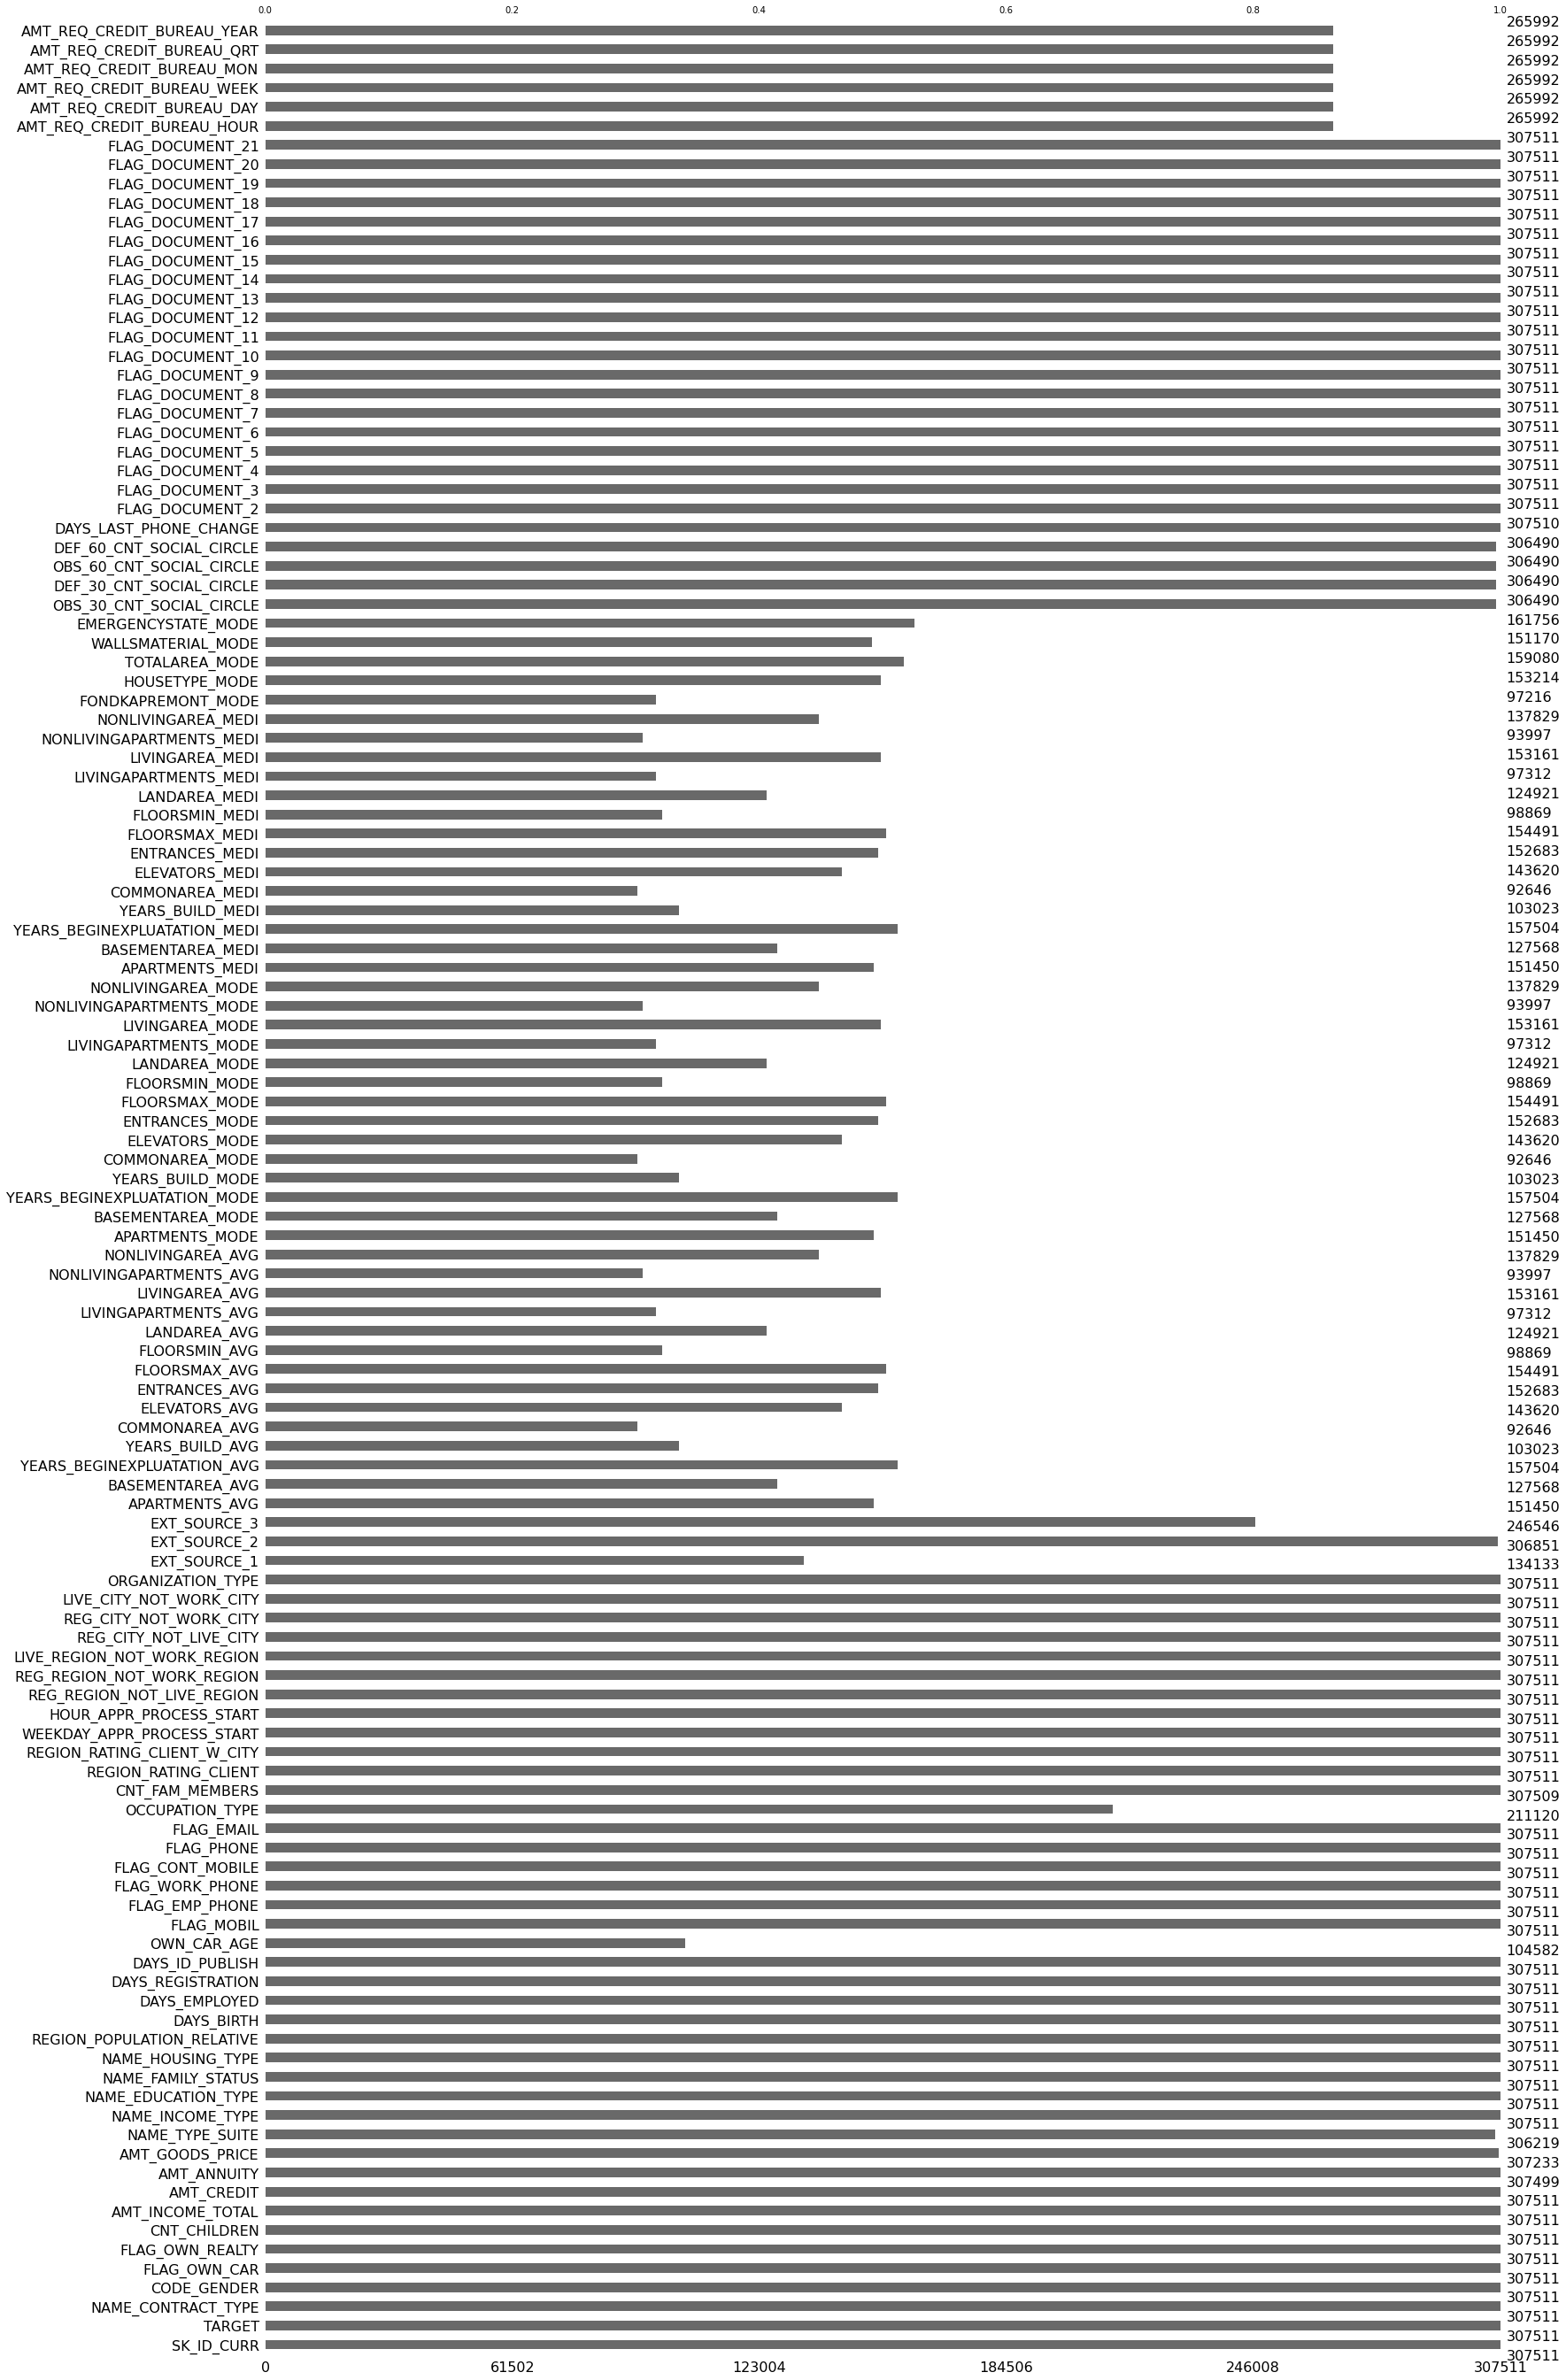

In [3]:
print("")
print("② 欠損値の有無を見る")
print("")
print(msno.bar(df_train))
#print(msno.matrix(df_train)) # 細かすぎて表示枠内では見辛かったためbarを使用


③ クラスの割合がわかるグラフを描く



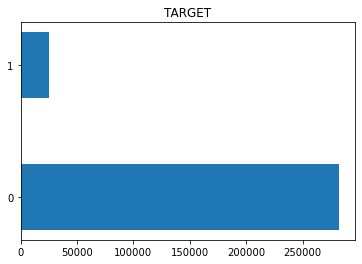

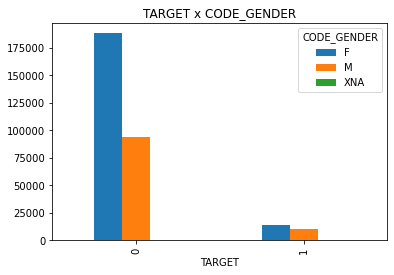

In [4]:
print("")
print("③ クラスの割合がわかるグラフを描く")
print("")

## 目的変数の割合を見る
# 目的変数を抽出
target_only = df_train["TARGET"].value_counts()

# 行数(y軸)を取得
y_labels = target_only.index
# y_labels = [0,1]

plt.title("TARGET")
plt.yticks(y_labels)
plt.barh(y_labels, target_only, 0.5)
#plt.barh(range(y_labels), target_only)
plt.show()

## 目的変数に対する各列の割合
# 目的変数（TARGET)でグループ分け
df_target = df_train.groupby("TARGET")

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_gender = df_target["CODE_GENDER"].value_counts()

#行と列を入れ替えて棒グラフへ表示
df_target_gender.unstack().plot.bar()
plt.title("TARGET x CODE_GENDER")
plt.show()

【問題3】課題設定<br>
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

目的変数（TARGET）との関係性は「Notebooks」を参考にすると<br>
・性別やローンの契約タイプの違いは関係が薄そう<br>
・土地や車の所有についても会計は薄そう<br>
・組織・業種と目的変数との関係はありそう<br>
・どのグラフも絶対数こそ違うが、返却した人、しなかった人でグラフの変化に特別大きな要素が見られない<br>
※絶対数でのみ比較していると思われるが、絶対数が違いすぎるため、目的変数との関係は割合で見た方が良い精度になるのではないか<br>

【問題4】データ探索<br>
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。<br>


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

① CODE_GENDERとの割合



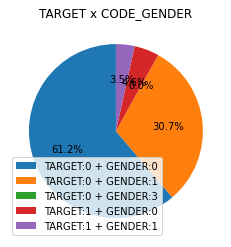

In [31]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("① CODE_GENDERとの割合")
print("")

# df_target = df_train.groupby("TARGET")
# 目的変数を抽出
# target_only = df_train["TARGET"].value_counts()
# 行数(y軸)を取得
# y_labels = target_only.index

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_gender = df_target["CODE_GENDER"].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in range(len(df_target_gender[i])):
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_gender[i][j] / record_num_df)

# ラベル作成
target_gender_labels = ["TARGET:0 + GENDER:0", "TARGET:0 + GENDER:1", "TARGET:0 + GENDER:3", "TARGET:1 + GENDER:0", "TARGET:1 + GENDER:1"]

# # 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x CODE_GENDER")
plt.legend(target_gender_labels)
plt.show()

# # 指数での表示を行わない
# print('%f' % divide_record_num)


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

② FLAG_OWN_CAR との割合



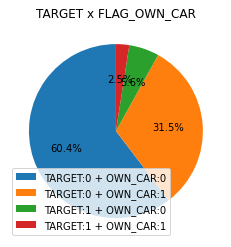

In [33]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("② FLAG_OWN_CAR との割合")
print("")

# df_target = df_train.groupby("TARGET")
# 目的変数を抽出
# target_only = df_train["TARGET"].value_counts()
# 行数(y軸)を取得
# y_labels = target_only.index

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_own_car = df_target["FLAG_OWN_CAR"].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in range(len(df_target_own_car[i])):
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_own_car[i][j] / record_num_df)

# ラベル作成
target_gender_labels = ["TARGET:0 + OWN_CAR:0", "TARGET:0 + OWN_CAR:1", "TARGET:1 + OWN_CAR:0", "TARGET:1 + OWN_CAR:1"]

# # 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x FLAG_OWN_CAR")
plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

③ FLAG_OWN_REALTY との割合



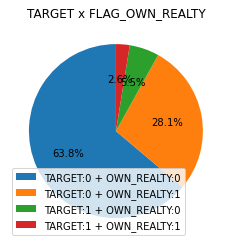

In [86]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("③ FLAG_OWN_REALTY との割合")
print("")

# df_target = df_train.groupby("TARGET")
# 目的変数を抽出
# target_only = df_train["TARGET"].value_counts()
# 行数(y軸)を取得
# y_labels = target_only.index

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_own_realty = df_target["FLAG_OWN_REALTY"].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in range(len(df_target_own_realty[i])):
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_own_realty[i][j] / record_num_df)

# ラベル作成
target_gender_labels = ["TARGET:0 + OWN_REALTY:0", "TARGET:0 + OWN_REALTY:1", "TARGET:1 + OWN_REALTY:0", "TARGET:1 + OWN_REALTY:1"]

# # 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x FLAG_OWN_REALTY")
plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

④ CNT_CHILDREN との割合



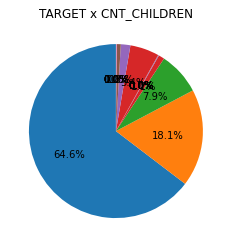

In [67]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("④ CNT_CHILDREN との割合")
print("")

SUBJECT = "CNT_CHILDREN"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_cnt_children = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_cnt_children[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_cnt_children[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# # 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
#plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

⑤ FLAG_EMAIL との割合



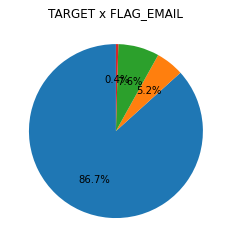

In [87]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("⑤ FLAG_EMAIL との割合")
print("")

SUBJECT = "FLAG_EMAIL"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_flag_email = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_flag_email[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_flag_email[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# # 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
#plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

⑥ REGION_RATING_CLIENT との割合



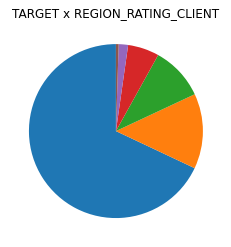

In [88]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("⑥ REGION_RATING_CLIENT との割合")
print("")

SUBJECT = "REGION_RATING_CLIENT"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_rating_client = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_rating_client[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_rating_client[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# 行と列を入れ替えて棒グラフへ表示
# plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.pie(divide_record_num, startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
#plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

⑦ NAME_TYPE_SUITE との割合



<ipython-input-72-f7d5c5752abf>:27: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)


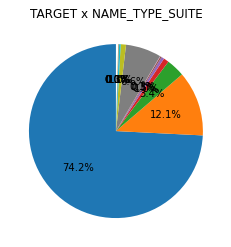

In [72]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("⑦ NAME_TYPE_SUITE との割合")
print("")

SUBJECT = "NAME_TYPE_SUITE"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_type_suite = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_type_suite[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_type_suite[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
# plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

⑧ NAME_INCOME_TYPE との割合



<ipython-input-89-4fe129811b6f>:27: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)


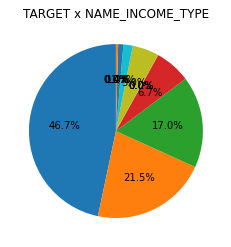

In [89]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("⑧ NAME_INCOME_TYPE との割合")
print("")

SUBJECT = "NAME_INCOME_TYPE"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_income_type = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_income_type[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_income_type[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
# plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

⑨ NAME_EDUCATION_TYPE との割合



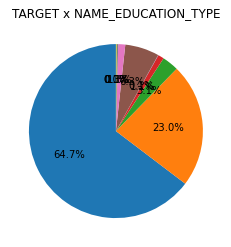

In [74]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("⑨ NAME_EDUCATION_TYPE との割合")
print("")

SUBJECT = "NAME_EDUCATION_TYPE"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_education_type = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_education_type[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_education_type[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
# plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

⑩ NAME_HOUSING_TYPE との割合



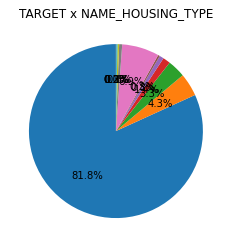

In [75]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("⑩ NAME_HOUSING_TYPE との割合")
print("")

SUBJECT = "NAME_HOUSING_TYPE"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_housing_type = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_housing_type[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_housing_type[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
# plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

⑪ CNT_FAM_MEMBERS との割合



<ipython-input-93-29e8959db551>:27: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)


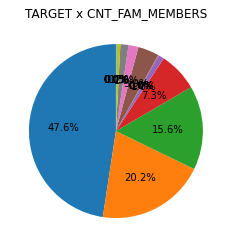

In [93]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("⑪ CNT_FAM_MEMBERS との割合")
print("")

SUBJECT = "CNT_FAM_MEMBERS"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_fam_members = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_fam_members[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_fam_members[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
# plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

⑫ FLAG_MOBIL との割合



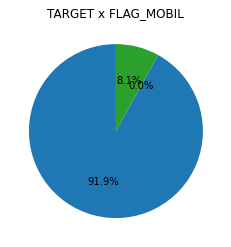

In [80]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("⑫ FLAG_MOBIL との割合")
print("")

SUBJECT = "FLAG_MOBIL"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_flag_mobil = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_flag_mobil[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_flag_mobil[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
# plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

⑬ FLAG_EMP_PHONE との割合



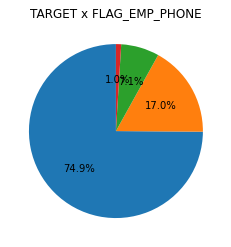

In [81]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("⑬ FLAG_EMP_PHONE との割合")
print("")

SUBJECT = "FLAG_EMP_PHONE"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_flag_emp_phone = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_flag_emp_phone[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_flag_emp_phone[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
# plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

⑭ FLAG_WORK_PHONE との割合



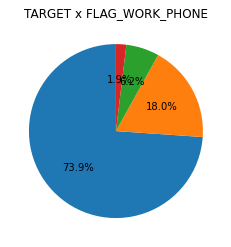

In [90]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("⑭ FLAG_WORK_PHONE との割合")
print("")

SUBJECT = "FLAG_WORK_PHONE"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_flag_work_phone = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_flag_work_phone[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_flag_work_phone[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
# plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

⑭ FLAG_CONT_MOBILE との割合



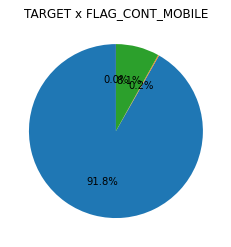

In [83]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("⑭ FLAG_CONT_MOBILE との割合")
print("")

SUBJECT = "FLAG_CONT_MOBILE"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_flag_cont_mobile = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_flag_cont_mobile[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_flag_cont_mobile[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
# plt.legend(target_gender_labels)
plt.show()


■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■

⑮ FLAG_PHONE との割合



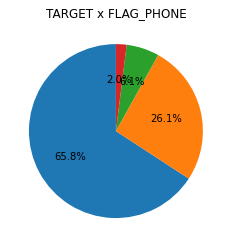

In [85]:
print("")
print("■■■ TARGETでデータをクラス分けし、各値での割合を見ていく ■■■")
print("")
print("⑮ FLAG_PHONE との割合")
print("")

SUBJECT = "FLAG_PHONE"

# 目的変数でグルーピングしたうえで、性別との割合をみる
df_target_flag_phone = df_target[SUBJECT].value_counts()

# 全データ（レコード）数
record_num_df = len(df_train)

# グループ（返済困難か否か）別のレコード数
divide_record_num = []

# value_counts()でカウントした値を総数で割り、割合を出す
for i in range(len(y_labels)):
    for j in df_target_flag_phone[i].index:
        # グルーピングした値を全レコードで割り、割合を出す
        divide_record_num.append(df_target_flag_phone[i][j] / record_num_df)
        # ラベル作成
        # target_gender_labels.append("TARGET:{} + {}:{}".format(i, SUBJECT, j))

# 行と列を入れ替えて棒グラフへ表示
plt.pie(divide_record_num, autopct="%1.1f%%", startangle=90)
plt.title("TARGET x {}".format(SUBJECT))
# plt.legend(target_gender_labels)
plt.show()

【考察】
分析するにあたって、各項目の意味をしっかりと把握したうえで、それに合った分析を行い、表示するグラフを選択する、などする必要があると感じた。
（今回は分析、表示が全て同じであるため）
項目数（ラベル数）が増えると、ひとつひとつの項目を理解する必要があるため、実務では大変な作業になると実感できた